TODO:
- [ ]

In [57]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import astropy
dir = 'Sensitivity'

In [58]:
# read in test data_eV from CR Flux - Gaisser et al 2016.csv
data = np.loadtxt(f'{dir}/CR Flux - Gaisser et al 2016.csv', delimiter=',', skiprows=1)
data = data[np.argsort(data[:, 0])]
# divide the x and y data_eV by 10 because the scale was off in the point getting site
data[:, 0] /= 10
data[:, 1] /= 10

In [59]:
# reproduce the cosmic ray spectrum broken power law equation
# def broken_power_law(E):
#     if E < 4e15:
#         return 1.8e4 * (E / 1e9)**-2.7
#     elif 4e15 <= E < 4e18:
#         return 1.8e4 * (4e15 / 1e9)**-2.7 * (E / 4e15)**-3.0
#     else:
#         return 1.8e4 * (4e15 / 1e9)**-2.7 * (4e18 / 4e15)**-3.0 * (E / 4e18)**-2.7
# # generate data_eV points from 10^8 to 10^22 eV
# E = np.logspace(0, 12, 1000)
# flux = np.array([broken_power_law(e) for e in E])

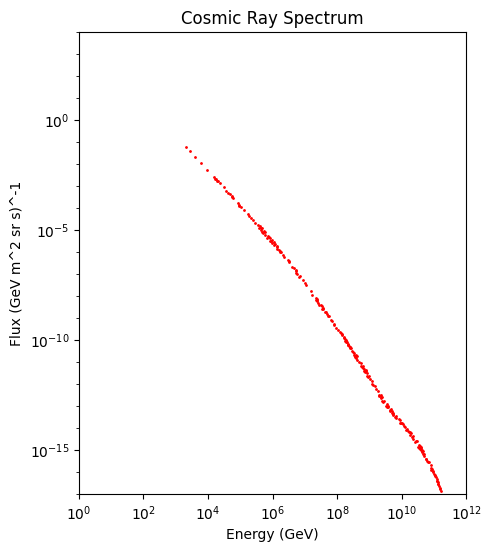

In [60]:
# plot the data_eV
plt.figure(figsize=(5, 6))
plt.scatter(data[:, 0], data[:, 1], label='data_eV', color='red', s=1)
# plt.plot(E, flux, label='Broken Power Law', color='blue')
plt.xlim(1e1,1e12)
plt.ylim(1e-17,1e4)
plt.xscale('log')
plt.yscale('log')

# import matplotlib.ticker as ticker

ax = plt.gca()

# X axis: major ticks at 10^0, 10^2, ..., 10^12
ax.set_xscale('log')
ax.xaxis.set_major_locator(ticker.LogLocator(base=10.0, subs=[1.0], numticks=13))
ax.set_xticks([10**i for i in range(0, 13, 2)])  # explicitly force 10^0, 10^2, ..., 10^12

# Y axis: major ticks only at 10^0, 10^-5, 10^-10, 10^-15
ax.set_yscale('log')
ax.set_yticks([1e0, 1e-5, 1e-10, 1e-15])

# Y axis: minor ticks at the intermediate decades
ax.yaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=np.arange(1.0, 1.0), numticks=100))

# (Optional) turn off minor tick labels if you only want tick marks
ax.yaxis.set_minor_formatter(ticker.NullFormatter())

plt.xlabel('Energy (GeV)')
# plt.ylabel('Flux (m^-2 s^-1 sr^-1 GeV^-1)')
plt.ylabel('Flux (GeV m^2 sr s)^-1')
# plt.ylabel('Flux (GeV cm^-2 sr^-1 s^-1)')
plt.title('Cosmic Ray Spectrum')

plt.savefig(f'{dir}/Cosmic Ray Spectrum - Reconstructed.png', dpi=300)

In [61]:
# convert the Energy from GeV to eV
# data_eV[:, 0] *= 1e9  # GeV to eV

# fill data_eV with the converted values
data_eV = data.copy()
data_eV[:, 0] *= 1e9  # GeV to eV


# convert Flux from (GeV cm^-2 sr^-1 s^-1) to (GeV m^-2 sr^-1 s^-1)
# data_eV[:, 1] *= 1e-4  # cm^-2 to m^-2


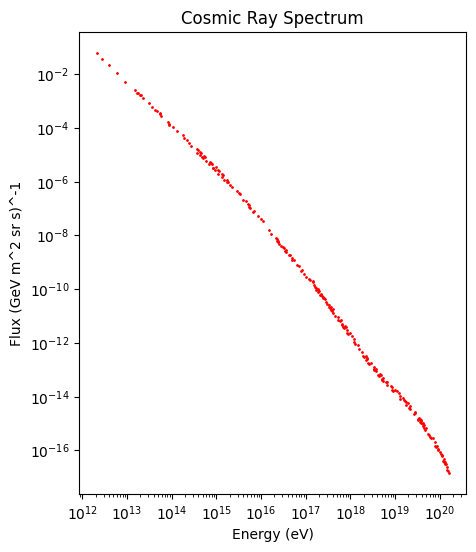

In [62]:
# plot the data_eV
plt.figure(figsize=(5, 6))
plt.scatter(data_eV[:, 0], data_eV[:, 1], label='data_eV', color='red', s=1)
# plt.plot(E, flux, label='Broken Power Law', color='blue')
# plt.xlim(1e1,1e12)
# plt.ylim(1e-17,1e4)
plt.xscale('log')
plt.yscale('log')

# import matplotlib.ticker as ticker

ax = plt.gca()

# # X axis: major ticks at 10^0, 10^2, ..., 10^12
# ax.set_xscale('log')
# ax.xaxis.set_major_locator(ticker.LogLocator(base=10.0, subs=[1.0], numticks=13))
# ax.set_xticks([10**i for i in range(0, 13, 2)])  # explicitly force 10^0, 10^2, ..., 10^12
#
# # Y axis: major ticks only at 10^0, 10^-5, 10^-10, 10^-15
# ax.set_yscale('log')
# ax.set_yticks([1e0, 1e-5, 1e-10, 1e-15])
#
# # Y axis: minor ticks at the intermediate decades
# ax.yaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=np.arange(1.0, 1.0), numticks=100))
#
# # (Optional) turn off minor tick labels if you only want tick marks
# ax.yaxis.set_minor_formatter(ticker.NullFormatter())

plt.xlabel('Energy (eV)')
plt.ylabel('Flux (GeV m^2 sr s)^-1')
plt.title('Cosmic Ray Spectrum')

plt.savefig(f'{dir}/Cosmic Ray Spectrum - Reconstructed - eV.png', dpi=300)

### $\Phi(E) = \Phi_0 E^{\gamma_1}$

where $\Phi_0$ is used as a normalization parameter, and $\gamma_1$ is the spectral index. The results from the fit are $\Phi_0 = 10^{4.48 \pm 0.01} m^{-2}s^{−1} sr^{−1} GeV^{−1}$ and $\gamma_1 = −2.649 \pm 0.001$ with $\chi^2_0 = 406.36$ for 8 degrees of freedom. Then, we apply a $\chi^2$ fit to the measured spectrum with a broken power-law function

### $\Phi(E) = \Phi_0 E^{\gamma_1} (1 + (E/E_0)^{\epsilon})^{(\gamma_2 - \gamma_1)/\epsilon}$

The fit yields $\Phi_0 = 10^{3.84 \pm 0.041} m^{−2}s^{−1} sr^{−1} GeV^{−1}$, $\gamma_1 = −2.5$, $\gamma_2 = −2.7$, $\epsilon = 9.9$, and $E_0 = 30.84 TeV$ with $\chi^2_1 = 0.21 for 5 degrees of freedom.

In [63]:
import numpy as np

EV_TO_GEV = 1e-9

def phi_powerlaw_eV(E_eV, Phi0=10**4.48, gamma1=-2.649):
    """
    Single power law:
      Phi(E) = Phi0 * (E_GeV)**gamma1
    Inputs:
      E_eV : energy in eV (array-like or scalar)
    Returns:
      Phi in (GeV m^2 sr s)^-1
    """
    E_GeV = np.asarray(E_eV, dtype=float) * EV_TO_GEV
    Phi = Phi0 * E_GeV**gamma1
    return float(Phi) if np.isscalar(E_eV) else Phi

def phi_broken_epsilon_eV(
        E_eV,
        Phi0 = 10**3.84,     # m^-2 s^-1 sr^-1 GeV^-1
        gamma1 = -2.5,
        gamma2 = -2.7,
        epsilon = 9.9,       # sharpness
        E0_TeV = 30.84       # TeV (break energy)
):
    """
    Smoothly-broken power law (epsilon parameterization):
      Phi(E) = Phi0 * (E_GeV)^gamma1 * [1 + (E/E0)^epsilon]^((gamma2 - gamma1)/epsilon)
    Notes:
      - The paper states E0 = 30.84 TeV. We convert to GeV internally.
      - E must use the SAME energy unit as E0 inside the ratio; here both are in GeV.
    Inputs:
      E_eV : energy in eV (array-like or scalar)
    Returns:
      Phi in (GeV m^2 sr s)^-1
    """
    E_GeV = np.asarray(E_eV, dtype=float) * EV_TO_GEV
    E0_GeV = E0_TeV * 1e3  # TeV -> GeV

    # guard: non-positive energies would be invalid for power-law
    if np.any(E_GeV <= 0):
        raise ValueError("Energies must be positive.")

    t = (E_GeV / E0_GeV)**epsilon
    Phi = Phi0 * E_GeV**gamma1 * (1.0 + t)**((gamma2 - gamma1)/epsilon)
    return float(Phi) if np.isscalar(E_eV) else Phi


In [64]:
# Example grid: 10^14 .. 10^21 eV
Egrid_eV = np.logspace(14, 21, 400)

Phi_PL   = phi_powerlaw_eV(Egrid_eV)                 # single power-law
Phi_BPL  = phi_broken_epsilon_eV(Egrid_eV)           # epsilon–broken PL

# Plot as you normally would; remember your y-axis units are per GeV already.
# If you want your custom decade-only ticks from earlier, reuse that snippet.


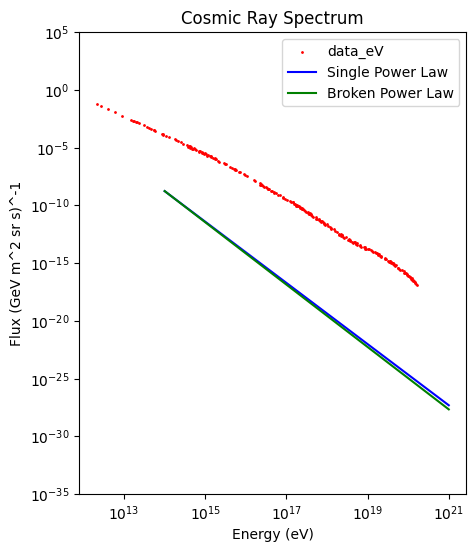

In [65]:
# plot the data_eV
plt.figure(figsize=(5, 6))
# plt.scatter(data_eV[:, 0], data_eV[:, 1], label='data_eV', color='red', s=1)
plt.scatter(data_eV[:, 0], data_eV[:, 1], label='data_eV', color='red', s=1)

plt.plot(Egrid_eV, Phi_PL, label='Single Power Law', color='blue')
plt.plot(Egrid_eV, Phi_BPL, label='Broken Power Law', color='green')

# plt.xlim(1e1,1e12
plt.ylim(1e-35,1e5)

plt.xscale('log')
plt.yscale('log')
# ax = plt.gca()
plt.xlabel('Energy (eV)')
plt.ylabel('Flux (GeV m^2 sr s)^-1')
plt.title('Cosmic Ray Spectrum')
plt.legend()

# plt.savefig(f'{dir}/Cosmic Ray Spectrum - Reconstructed - eV.png', dpi=300)

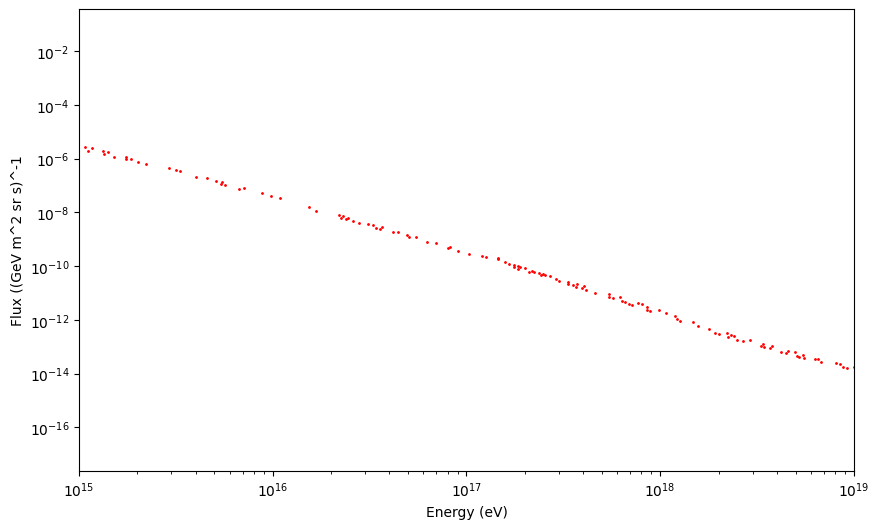

In [66]:
# plot the data_eV from 10^15 to 10^12 eV
plt.figure(figsize=(10, 6))
plt.scatter(data_eV[:, 0], data_eV[:, 1], label='data_eV', color='red', s=1)
# plt.plot(E, flux, label='Broken Power Law', color='blue')
plt.xlim(1e15, 1e19)
# plt.ylim(1e-6,1e4)
plt.xscale('log')
plt.yscale('log')

plt.xlabel('Energy (eV)')
# plt.ylabel('Flux (m^-2 s^-1 sr^-1 eV^-1)')
plt.ylabel('Flux ((GeV m^2 sr s)^-1')
plt.savefig(f'{dir}/Cosmic Ray Spectrum - Cropped Spectrum.png', dpi=300)

In [67]:
# for any duplicate x values, average the y values
unique_x = np.unique(data_eV[:, 0])
averaged_data = []
for x in unique_x:
    y_values = data_eV[data_eV[:, 0] == x, 1]
    averaged_y = np.mean(y_values)
    averaged_data.append([x, averaged_y])
data_eV = np.array(averaged_data)
# interpolate the data_eV to get a smooth curve
from scipy.interpolate import interp1d
interp_func = interp1d(data_eV[:, 0], data_eV[:, 1], kind='cubic', fill_value="extrapolate")
x_interp = np.logspace(np.log10(min(data_eV[:, 0])), np.log10(max(data_eV[:, 0])), 100)
y_interp = interp_func(x_interp)
## plot the interpolated data_eV
# plt.figure(figsize=(10, 6))
# plt.plot(data_eV[:, 0], data_eV[:, 1], 'o', label='Original data_eV', color='red')
# plt.plot(x_new, y_new, label='Interpolated data_eV', color='blue')
# plt.xscale('log')
# plt.yscale('log')

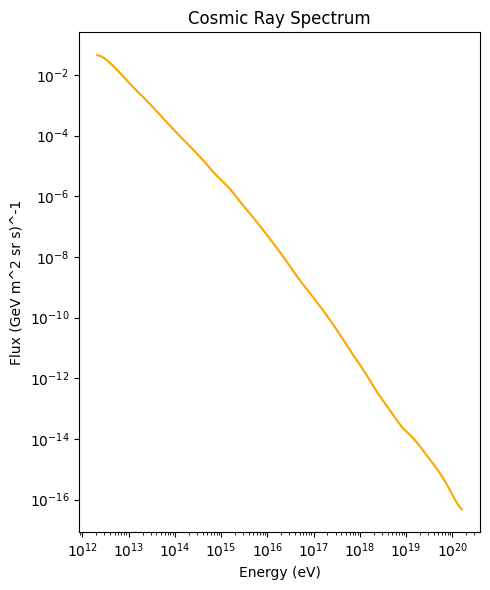

In [68]:
# # smooth the curve using a moving average
# def moving_average(y, window_size):
#     return np.convolve(y, np.ones(window_size)/window_size, mode='same')
# y_smooth = moving_average(y_new, window_size=5)
# # plot the smoothed data_eV
# plt.figure(figsize=(5, 6))
# # plt.plot(data_eV[:, 0], data_eV[:, 1], 'o', label='Original data_eV', color='red', markersize=2)
# plt.plot(x_new, y_smooth, label='Smoothed data_eV', color='orange')
# plt.xscale('log')
# plt.yscale('log')
# # plt.xlim(1e4,.5*1e12)
# plt.xlabel('Energy (eV)')
# plt.ylabel('Flux (eV cm^-2 sr^-1 s^-1)')
# plt.title('Smoothed Cosmic Ray Spectrum')
# plt.legend()
# plt.savefig(f'{dir}/Smoothed Cosmic Ray Spectrum - eV.png', dpi=300)

# smooth the curve using gaussian filter
from scipy.ndimage import gaussian_filter1d
y_smooth = gaussian_filter1d(y_interp, sigma=2)
# plot the smoothed data_eV
plt.figure(figsize=(5, 6))
# plt.plot(data_eV[:, 0], data_eV[:, 1], 'o', label='Original data_eV', color='red', markersize=2)
plt.plot(x_interp, y_smooth, label='Smoothed data_eV', color='orange')
plt.xscale('log')
plt.yscale('log')
# plt.xlim(1e4,.5*1e12)
plt.xlabel('Energy (eV)')
plt.ylabel('Flux (GeV m^2 sr s)^-1')
plt.title('Cosmic Ray Spectrum')
plt.tight_layout()

# plt.legend()
plt.savefig(f'{dir}/Smoothed Cosmic Ray Spectrum - eV.png', dpi=300)

In [69]:
# discrete_sensitivity in form log10(E), efficiency

# discrete_sensitivity = np.array([  # original table values - for shower energy
#     [16.0, 0.0204],
#     [16.5, 0.1082],
#     [17.0, 0.1671],
#     [17.5, 0.2144],
#     [18.0, 0.2460],
#     [18.5, 0.2849],
#     [19.0, 0.2938]
# ])

trigger_efficiency = np.array([  # de-rated by 10% to account for loss of energy from the primary cosmic ray to the shower
    [17.0, 0.0204],
    [17.5, 0.1082],
    [18.0, 0.1671],
    [18.5, 0.2144],
    [19.0, 0.2460],
    [19.5, 0.2849],
    [20.0, 0.2938]
])

# interpolate the trigger efficiency to get a smooth curve
from scipy.interpolate import interp1d
interp_func = interp1d(trigger_efficiency[:, 0], trigger_efficiency[:, 1], kind='cubic', fill_value="extrapolate")
x_sensitivity = np.linspace(17, 20, 100)
y_sensitivity = interp_func(x_sensitivity)

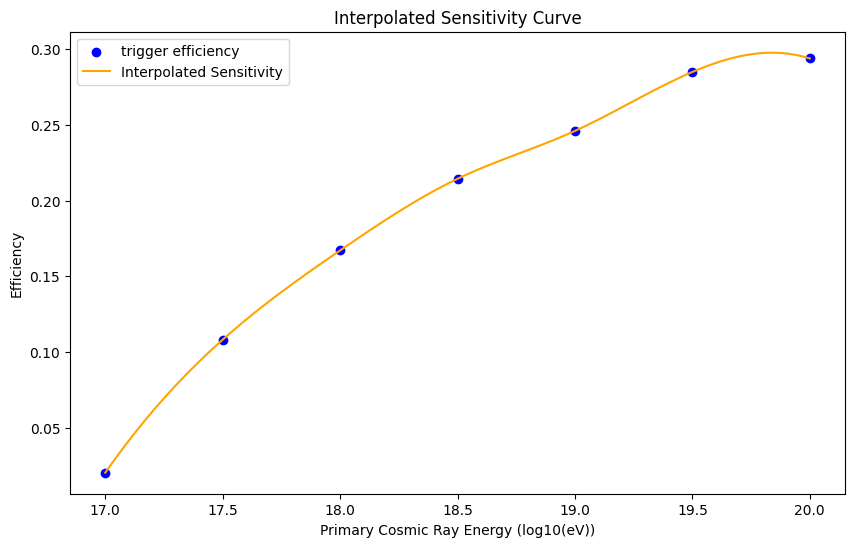

In [70]:
# as a dummy test, plot the interpolated sensitivity curve over a scatter plot of the discrete points
plt.figure(figsize=(10, 6))
plt.scatter(trigger_efficiency[:, 0], trigger_efficiency[:, 1], label='trigger efficiency', color='blue')
plt.plot(x_sensitivity, y_sensitivity, label='Interpolated Sensitivity', color='orange')
plt.xlabel('Primary Cosmic Ray Energy (log10(eV))')
plt.ylabel('Efficiency')
plt.title('Interpolated Sensitivity Curve')
plt.legend()
# plt.grid(True)
plt.savefig(f'{dir}/Interpolated RNO-G Sensitivity.png', dpi=300)

In [71]:
# find the estimated number of events at each energy in data_eV by multiplying the sensitivity by the flux using the smoothed sensitivity curve

# then, for each energy in data_eV, find the corresponding sensitivity from the interpolated sensitivity curve
# and multiply it by the flux
estimated_events = []
# flux_x = data_eV[:, 0]
# flux_y = data_eV[:, 1]
# use the smoothed y values
flux_x = x_interp
flux_y = y_smooth
# print(len(flux_x), len(flux_y))

for E, flux in zip(flux_x, flux_y):
    logE = np.log10(E)
    if logE < min(x_sensitivity) or logE > max(x_sensitivity):
        efficiency = 0
    else:
        efficiency = interp_func(logE)
    estimated_event = efficiency * flux
    estimated_events.append(estimated_event)
estimated_events = np.array(estimated_events)

(1e-17, 1e-10)

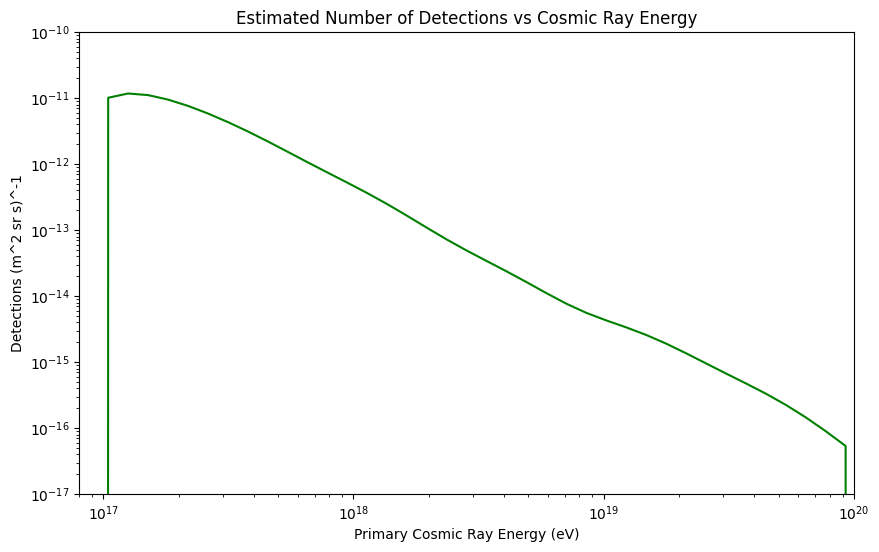

In [72]:
# plot the estimated number of events vs energy
plt.figure(figsize=(10, 6))
plt.plot(flux_x, estimated_events, label='Estimated Events', color='green')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Primary Cosmic Ray Energy (eV)')
plt.ylabel('Detections (m^2 sr s)^-1')
plt.title('Estimated Number of Detections vs Cosmic Ray Energy')
plt.xlim(0.8*1e17, 1e20)
plt.ylim(1e-17,1e-10)

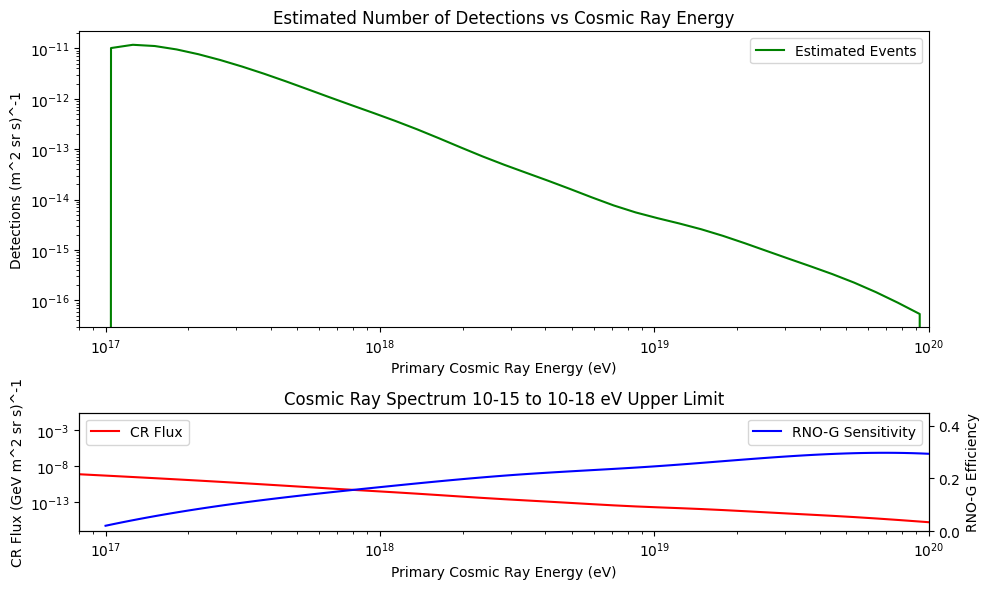

In [73]:
# plot the estimated number of events vs energy with the sensitivity curve and Cosmic Ray spectrum in a plot below
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), gridspec_kw={'height_ratios': [2.5, 1]})
# plot estimated events
# ax1.plot(data_eV[:, 0], estimated_events, label='Estimated Events', color='green')
ax1.plot(flux_x, estimated_events, label='Estimated Events', color='green')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Primary Cosmic Ray Energy (eV)')
ax1.set_ylabel('Detections (m^2 sr s)^-1')
ax1.set_title('Estimated Number of Detections vs Cosmic Ray Energy')
# ax1.set_xlim(0.8*1e15, 1e18)
# ax1.set_xlim(0.8*1e15, 1e18)
ax1.set_xlim(0.8*1e17, 1e20)

# ax1.set_ylim(1e-13,1e-6)
# ax1.grid(True, which='both', ls='--', lw=0.5)
# plot sensitivity and Cosmic Ray spectrum
# ax2.plot(data_eV[:, 0], data_eV[:, 1], label='CR Flux', color='red')
ax2.plot(x_interp, y_smooth, label='CR Flux', color='red')
# ax2.set_xlim(0.8*1e15, 1e18)
ax2.set_xlim(0.8*1e17, 1e20)
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlabel(('Primary Cosmic Ray Energy (eV)'))
# ax2.set_ylabel('Cosmic Ray Energy Flux (cm^-2 s^-1)')
ax2.set_ylabel('CR Flux (GeV m^2 sr s)^-1')
ax2.set_title('Cosmic Ray Spectrum 10-15 to 10-18 eV Upper Limit')
# ax2.set_ylim(1e-13,1e-2)
# ax2.grid(True, which='both', ls='--', lw=0.5)
# twin axis for sensitivity
ax3 = ax2.twinx()
# ax3.plot(10 ** x_sensitivity, y_interp, label='RNO-G Sensitivity', color='blue')
ax3.plot(10 ** x_sensitivity, y_sensitivity, label='RNO-G Sensitivity', color='blue')
ax3.set_ylim(0, 0.45)
# ax3.set_yscale('log')
ax3.set_ylabel('RNO-G Efficiency')
# add legends
ax1.legend()
# ax2.legend(loc='upper right')
# ax3.legend(loc='right')
ax2.legend(loc='upper left')
ax3.legend(loc='upper right')
# ax2.legend()
# ax3.legend()
plt.tight_layout()

plt.savefig(f'{dir}/Estimated Detections and Sensitivity.png', dpi=300)

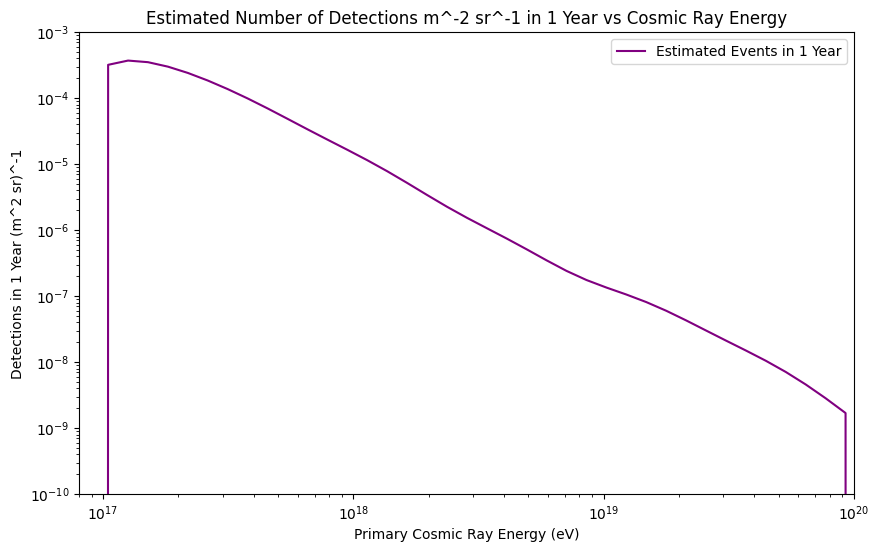

In [74]:
# plot the estimated number of events in a one year period
year = 365 * 24 * 3600  # seconds in a year
estimated_events_year = estimated_events * year
plt.figure(figsize=(10, 6))
plt.plot(flux_x, estimated_events_year, label='Estimated Events in 1 Year', color='purple')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Primary Cosmic Ray Energy (eV)')
plt.ylabel('Detections in 1 Year (m^2 sr)^-1')
plt.title('Estimated Number of Detections m^-2 sr^-1 in 1 Year vs Cosmic Ray Energy')
plt.xlim(0.8*1e17, 1e20)
plt.ylim(1e-10,1e-3)

plt.legend()
plt.savefig(f'{dir}/Estimated Detections in 1 Year vs Cosmic Ray Energy.png', dpi=300)

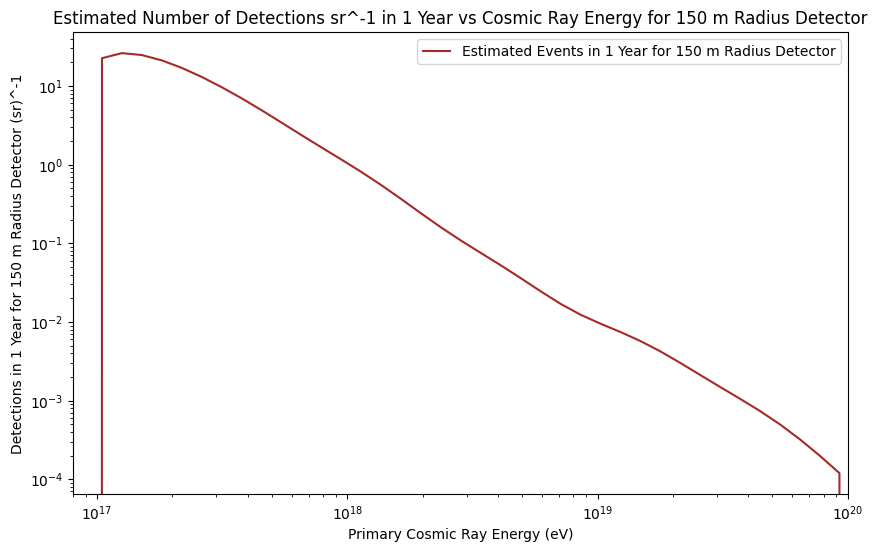

In [75]:
# detector radius 150 m
radius = 150  # m
area = np.pi * radius**2  # m^2

# plot the estimated number of events in a one year period for the detector area
estimated_events_year_area = estimated_events_year * area
plt.figure(figsize=(10, 6))
plt.plot(flux_x, estimated_events_year_area, label='Estimated Events in 1 Year for 150 m Radius Detector', color='brown')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Primary Cosmic Ray Energy (eV)')
plt.ylabel('Detections in 1 Year for 150 m Radius Detector (sr)^-1')
plt.title('Estimated Number of Detections sr^-1 in 1 Year vs Cosmic Ray Energy for 150 m Radius Detector')
plt.xlim(0.8*1e17, 1e20)
# plt.ylim(1e-8,1e-1)
plt.legend()
plt.savefig(f'{dir}/Estimated Detections in 1 Year vs Cosmic Ray Energy for 150 m Radius Detector - log.png', dpi=300)

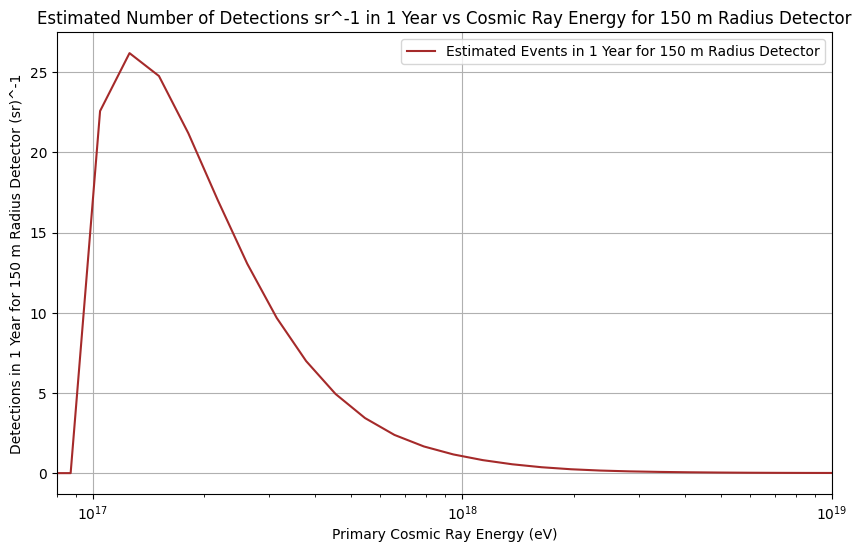

In [76]:
# detector radius 150 m
radius = 150  # m
area = np.pi * radius**2  # m^2

# plot the estimated number of events in a one year period for the detector area
estimated_events_year_area = estimated_events_year * area
plt.figure(figsize=(10, 6))
plt.plot(flux_x, estimated_events_year_area, label='Estimated Events in 1 Year for 150 m Radius Detector', color='brown')
plt.xscale('log')
# plt.yscale('log')
plt.xlabel('Primary Cosmic Ray Energy (eV)')
plt.ylabel('Detections in 1 Year for 150 m Radius Detector (sr)^-1')
plt.title('Estimated Number of Detections sr^-1 in 1 Year vs Cosmic Ray Energy for 150 m Radius Detector')
plt.xlim(0.8*1e17, 1e19)
# plt.ylim(1e-8,1e-1)
plt.grid()
plt.legend()
plt.savefig(f'{dir}/Estimated Detections in 1 Year vs Cosmic Ray Energy for 150 m Radius Detector - linear.png', dpi=300)

# factor in CODALEMA efficiency as a rough estimate of the real efficiency

In [77]:
detector_sensitivity = np.array([
    [1 * 10**(16.1), 3/3626],
    [1 * 10**(16.3), 8/2130],
    [1 * 10**(16.5), 5/1119],
    [1 * 10**(16.7), 20/560],
    [1 * 10**(16.9), 45/280],
    [1 * 10**(17.1), 36/105],
    [1 * 10**(17.3), 25/49],
    [1 * 10**(17.5), 9/14],
    # [1 * 10**(17.7), 2/4],
    # [1 * 10**(17.9), 1/2]
])

In [78]:
# interpolate the trigger efficiency to get a smooth curve
from scipy.interpolate import interp1d
interp_func = interp1d(np.log10(detector_sensitivity[:, 0]), detector_sensitivity[:, 1], kind='cubic', fill_value="extrapolate")
x_sensitivity = np.linspace(16, 18, 100)
y_sensitivity = interp_func(x_sensitivity)
# print the max of y_sensitivity and the x value at which it occurs
print(f'Maximum efficiency: {max(y_sensitivity)} at log10(E) = {x_sensitivity[np.argmax(y_sensitivity)]}')

Maximum efficiency: 0.7869098682215894 at log10(E) = 17.97979797979798


(0.0, 1.0)

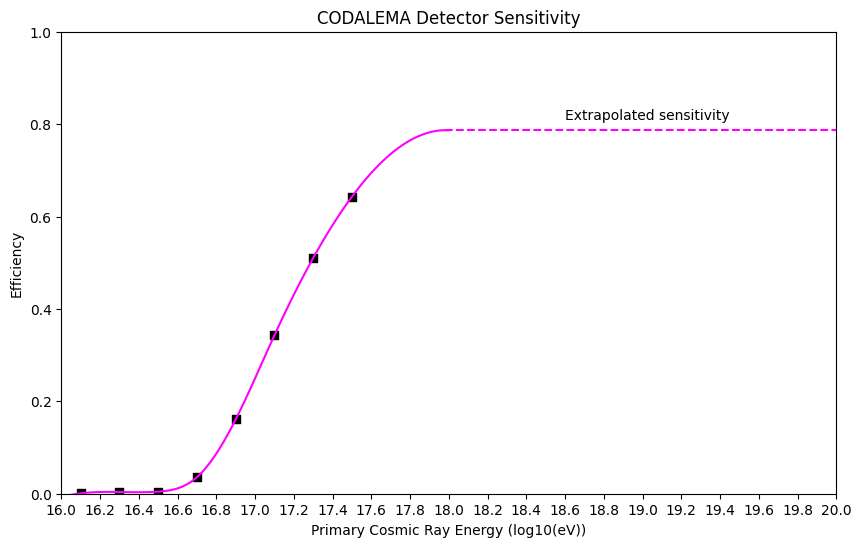

In [79]:
# plot these points
plt.figure(figsize=(10, 6))
# plt.scatter(detector_sensitivity[:, 0], detector_sensitivity[:, 1], label='CODALEMA Sensitivity', color='cyan')
# plot the log of the x values
plt.scatter(np.log10(detector_sensitivity[:, 0]), detector_sensitivity[:, 1], label='CODALEMA Sensitivity',marker='s', color='black')
plt.plot(x_sensitivity, y_sensitivity, label='Interpolated CODALEMA Sensitivity', color='magenta')
# plot a horizontal magenta line from 17.979797 to 20 at y=0.0.78690986
plt.hlines(y=0.7869098682215894, xmin=17.97979797979798, xmax=20, colors='magenta', linestyles='dashed', label='Max Efficiency Line')
plt.text(18.6, 0.81, 'Extrapolated sensitivity', color='black')
# plt.xscale('log')
# plt.yscale('log')
plt.xlabel('Primary Cosmic Ray Energy (log10(eV))')
plt.ylabel('Efficiency')
plt.title('CODALEMA Detector Sensitivity')
plt.xlim(16, 20)
# set the x ticks to every 0.2
plt.xticks(np.arange(16, 20.1, 0.2))
plt.ylim(0,1)